# Drying Time Predictor
#### Prediction of process time for drying of Grapes to Raisins

#### Data Aquisition & Cleaning

In [2]:
import os
import pandas as pd
path = os.getcwd() + '\data\LiteratureData_20220809.xlsx'
df_org = pd.read_excel(path)

In [3]:
df_org.columns

Index(['Sr. No.', 'Year', 'Author', 'Exp', 'Data', 'Vel', 'Temp', 'RH',
       'hours', 'Fit', 'Variety', 'Technique', 'Pretreatment', 'P_temp',
       'P_time', 'kg_r', 'kg_m', 'Diff_r', 'Diff_m', 'Do', 'TD', 'alpha',
       'aLR', 'aRL', 'mwR', 'Density', 'Berry Count', 'Radius', 'Dry_Mass',
       'Weight_i', 'Vol_i', 'Water_i', 'MR_i', 'MC_i', 'MC_i.1', 'Weight_f',
       'Vol_f', 'Water_f', 'MC_eq_Lit', 'MC_eq_Lit.1', 'MR_f', 'MC_f',
       'MC_f.1', 'Pretreatment.1'],
      dtype='object')

In [4]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sr. No.         558 non-null    int64  
 1   Year            558 non-null    int64  
 2   Author          558 non-null    object 
 3   Exp             558 non-null    int64  
 4   Data            558 non-null    int64  
 5   Vel             558 non-null    float64
 6   Temp            558 non-null    float64
 7   RH              558 non-null    float64
 8   hours           558 non-null    int64  
 9   Fit             558 non-null    float64
 10  Variety         558 non-null    object 
 11  Technique       558 non-null    object 
 12  Pretreatment    558 non-null    object 
 13  P_temp          558 non-null    object 
 14  P_time          558 non-null    object 
 15  kg_r            9 non-null      object 
 16  kg_m            558 non-null    float64
 17  Diff_r          0 non-null      flo

## Modelling - Multi-Linear Regression OLS

In [6]:
X_features = ['Vel', 'Temp', 'RH', 'Variety', 'Technique', 'Pretreatment', 'P_temp', 'P_time', ]
Catergorical_features = ['Variety', 'Technique', 'Pretreatment']
Y_actual   = ['hours']


#### One hot encoding - For categorical Features Pretreatment type, Variety, Technique

In [7]:
df_org['Pretreatment'].unique()

array(['Chemical', 'Untreated', 'ChemMic', 'Microwave', 'Physical',
       'Ohmic', 'Electric', 'Hot Air', 'Plasma', 'Freezing', 'Cryogenic'],
      dtype=object)

In [8]:
df_org['Variety'].unique()

array(['Thomson', 'Ruby', 'Emerald', 'Delight', 'Rodi', 'Unreported',
       'Flame', 'Muscatel', 'Italia', 'Aledo', 'Nevado', 'Chasselas',
       'Red', 'Tunisian', 'Seeded', 'Perlette', 'Black', 'Monukka ',
       'Monukka', 'Globe', 'Sugraone', 'Tempranillo', 'Asgari', 'Crimson',
       'Centennial'], dtype=object)

In [9]:
df_org['Technique'].unique()

array(['Dark', 'Shade', 'Open Sun', 'Convective', 'MicroWave',
       'Fluidized bed', 'ConMic'], dtype=object)

In [10]:
df_encoded = pd.get_dummies(df_org[X_features],
                            columns = Catergorical_features,
                            drop_first=True
                           )

In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vel                      558 non-null    float64
 1   Temp                     558 non-null    float64
 2   RH                       558 non-null    float64
 3   P_temp                   558 non-null    object 
 4   P_time                   558 non-null    object 
 5   Variety_Asgari           558 non-null    uint8  
 6   Variety_Black            558 non-null    uint8  
 7   Variety_Centennial       558 non-null    uint8  
 8   Variety_Chasselas        558 non-null    uint8  
 9   Variety_Crimson          558 non-null    uint8  
 10  Variety_Delight          558 non-null    uint8  
 11  Variety_Emerald          558 non-null    uint8  
 12  Variety_Flame            558 non-null    uint8  
 13  Variety_Globe            558 non-null    uint8  
 14  Variety_Italia           5

#### Feature Modifications

In [12]:
df_encoded['P_temp'].replace(to_replace=dict(Untreated=25.001, NotApplicable = 25.001), inplace=True)
df_encoded['P_time'].replace(to_replace=dict(Untreated=0.0001, NotApplicable = 25.001), inplace=True)

In [13]:
df_encoded['P_temp'] = df_encoded['P_temp'].astype(float)
df_encoded['P_time'] = df_encoded['P_time'].astype(float)

In [14]:
X_features = df_encoded.columns
Y_actual   = df_org.hours

In [15]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = sm.add_constant(df_encoded)
Y = df_org['hours']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    train_size = 0.8,
                                                    random_state = 23)

c:\Users\ameya\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Multilinear Regression OLS

In [16]:
model_1 = sm.OLS(y_train, X_train).fit()
print(model_1.summary2())

                        Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.702    
Dependent Variable:       hours                AIC:                    5198.0438
Date:                     2022-11-25 22:29     BIC:                    5386.6585
No. Observations:         446                  Log-Likelihood:         -2553.0  
Df Model:                 45                   F-statistic:            24.26    
Df Residuals:             400                  Prob (F-statistic):     2.42e-88 
R-squared:                0.732                Scale:                  6121.2   
--------------------------------------------------------------------------------
                          Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
--------------------------------------------------------------------------------
const                    124.3274   47.4223  2.6217 0.0091    31.0993   217.5554
Vel                      -28.8253    3.9969 -7.2119 0

#### Variance Inflation Factor (VIF)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(X):
    X_matrix = X.to_numpy()
    vif = [variance_inflation_factor (X_matrix, i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [18]:
vif_factors = get_vif(X[X_features])
vif_factors

,column,VIF
0,Vel,8.459363
1,Temp,39.298243
2,RH,6.796098
3,P_temp,7.213549
4,P_time,2525.290203
5,Variety_Asgari,3.296953
6,Variety_Black,1.577612
7,Variety_Centennial,1.351229
8,Variety_Chasselas,1.171906
9,Variety_Crimson,1.177173


In [19]:
columnns_with_large_vif = vif_factors[vif_factors.VIF > 4].column
columnns_with_large_vif 

0                        Vel
1                       Temp
2                         RH
3                     P_temp
4                     P_time
26           Variety_Thomson
29      Technique_Convective
35     Pretreatment_Chemical
38     Pretreatment_Freezing
39      Pretreatment_Hot Air
43       Pretreatment_Plasma
44    Pretreatment_Untreated
Name: column, dtype: object

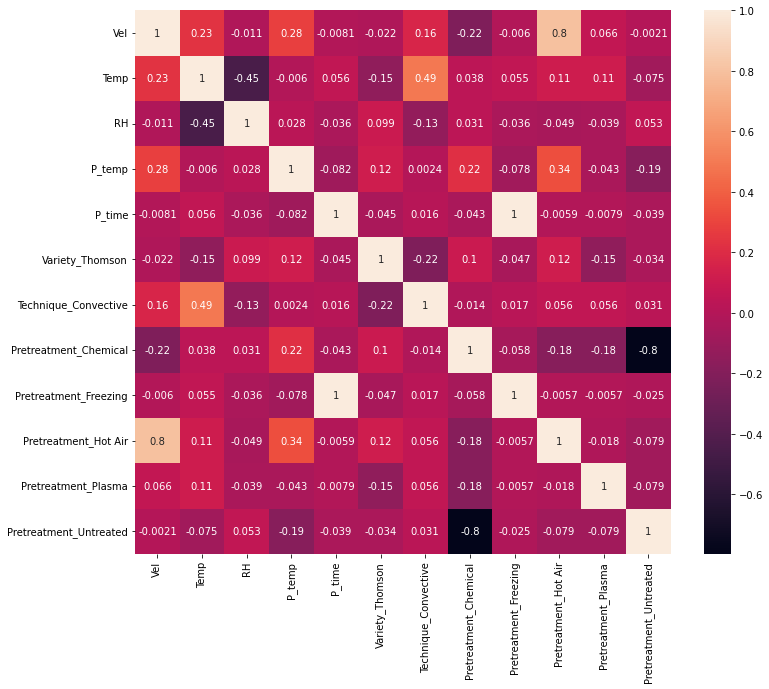

In [21]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sn.heatmap(X[columnns_with_large_vif].corr(), annot = True);

In [22]:
features_to_be_removed = ['Pretreatment_Hot Air', 'RH','Pretreatment_Chemical', 'Pretreatment_Freezing', 'Technique_Convective']

In [23]:
X_new_features = list(set(X_features) - set(features_to_be_removed))

In [24]:
get_vif(X[X_new_features])

,column,VIF
0,Pretreatment_Ohmic,2.258499
1,Variety_Tempranillo,1.272951
2,Temp,11.320808
3,Variety_Italia,1.252013
4,Pretreatment_Cryogenic,2.094754
5,Variety_Red,2.670791
6,Variety_Globe,1.398018
7,Variety_Seeded,1.376477
8,Technique_MicroWave,1.029261
9,Variety_Tunisian,1.163879


In [27]:
X_train = X_train[X_new_features]
model_2 = sm.OLS(y_train, X_train).fit()
print(model_2.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.715    
Dependent Variable:     hours            AIC:                         5322.1956
Date:                   2022-11-25 22:30 BIC:                         5486.2084
No. Observations:       446              Log-Likelihood:              -2621.1  
Df Model:               40               F-statistic:                 28.92    
Df Residuals:           406              Prob (F-statistic):          7.00e-95 
R-squared (uncentered): 0.740            Scale:                       8183.6   
-------------------------------------------------------------------------------
                             Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
-------------------------------------------------------------------------------
Pretreatment_Ohmic           42.1090  87.0179  0.4839 0.6287 -128.9529 213.1709
Variety_Tempranillo          46.1971  50.2310  0.9197 0.3583  -5

In [28]:
significant_variables = ['Vel', 'Variety_Thomson', 'Variety_Muscatel', 'Technique_Open Sun', 'Variety_Globe', 'Variety_Crimson',
                         'Variety_Centennial', 'Technique_Shade', 'Variety_Monukka', 'Pretreatment_Untreated', 'Variety_Seeded',
                         'Technique_Dark', 'Variety_Ruby', 'Temp', 'P_temp', 'Variety_Italia']

significant_variables_2 = ['Vel', 'Variety_Thomson', 'Variety_Muscatel', 'Technique_Open Sun', 'Variety_Globe', 'Variety_Crimson',
                         'Variety_Centennial', 'Technique_Shade', 'Variety_Monukka', 'Pretreatment_Untreated', 'Variety_Seeded',
                         'Technique_Dark', 'Variety_Ruby', 'Variety_Italia']

In [29]:
X_train = X_train[significant_variables_2]
model_3 = sm.OLS(y_train, X_train).fit()
print(model_3.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.716    
Dependent Variable:     hours            AIC:                         5295.9158
Date:                   2022-11-25 22:31 BIC:                         5353.3203
No. Observations:       446              Log-Likelihood:              -2634.0  
Df Model:               14               F-statistic:                 81.27    
Df Residuals:           432              Prob (F-statistic):          2.08e-111
R-squared (uncentered): 0.725            Scale:                       8147.7   
--------------------------------------------------------------------------------
                          Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
--------------------------------------------------------------------------------
Vel                       -3.2036    1.8215  -1.7588  0.0793   -6.7836    0.3764
Variety_Thomson           48.1164    7.0737   6.8021  0.0000

#### Residual Analysis for MLR

##### Normality Test

In [45]:


def draw_pp_plot(model, title):
    probplot = sm.ProbPlot(model.resid);
    plt.figure(figsize=(8,6));
    probplot.ppplot(line='45');
    plt.title(title);
    plt.show();

c:\Users\ameya\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x432 with 0 Axes>

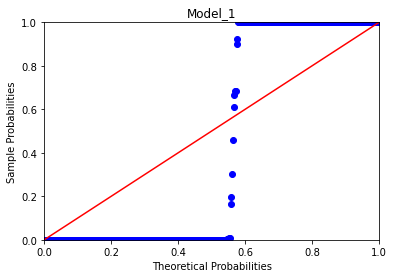

In [49]:
draw_pp_plot(model_3, 'Model_1');

##### Homoscedasticity Test

In [53]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

def plot_resid_fitted (fitted, resid, title):
    plt.scatter(get_standardized_values(fitted),
                get_standardized_values(resid)
               );               
    plt.title(title); plt.grid(True)
    plt.xlabel("Predicted"); plt.ylabel("Residual");
    plt.show();

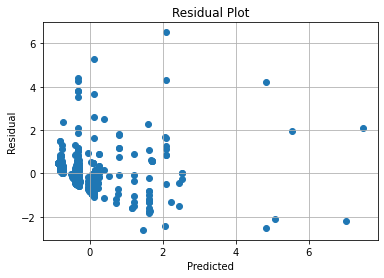

In [54]:
plot_resid_fitted(model_3.fittedvalues,
                  model_3.resid,
                  'Residual Plot')